# Закономерности успешности компьютерной игры


### Задача проекта:

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Нам доступны данные до 2016 года. Считаем, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


### План действий по проекту:
Шаг 1. Открыть файл с данными и изучить общую информацию.

Шаг 2. Подготовить данные

Шаг 3. Провести исследовательский анализ данных

Шаг 4. Составим портрет пользователя каждого региона

Шаг 5. Проверим гипотезы

Шаг 6. Общий вывод


## Описание признакового пространства
|Имя поля|Описание поля|
|-------------:|:------------|
|**Name** | название игры|
|**Platform** | платформа|
|**Year_of_Release** |  год выпуска|
|**Genre** | жанр игры|
|**NA_sales** | продажи в Северной Америке (миллионы проданных копий)|
|**EU_sales** | продажи в Европе (миллионы проданных копий)|
|**JP_sales** | продажи в Японии (миллионы проданных копий)|
|**Other_sales** | продажи в других странах (миллионы проданных копий)|
|**Critic_Score** | оценка критиков (максимум 100)|
|**User_Score** | оценка пользователей (максимум 10)|
|**Rating** | рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию|

Данные за 2016 год могут быть неполными.

## Шаг 1. Открыть файл с данными и изучить общую информацию.
Для чтения данных воспользуемся методом `read_csv()`.

Далее с помощью методов 
- `.head()`, `.tail() `
- `.info()`;
- `.describe()`

ознакомимся с предоставленными данными. 

Начнем с импорта библиотек, по мере выполнения проекта дописывая сюда необходимые библиотеки.  


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker
from scipy import stats as st


In [2]:
try:
    df = pd.read_csv('games.csv')
except: 
    df = pd.read_csv('/datasets/games.csv')


### 1.1 Размерность, просмотр начальных и конечных записей набора, описательные статистики

In [3]:
df.head(10) # первые 10 строк данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10) # последние 10 строк данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.info() #информация по столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe() #описательные статистики

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# описательные статистики по типам
for t in set(df.dtypes):
    print('\033[1m' + "Переменные типа" + '\033[0m', t)
    print(df.select_dtypes(include = [t]).describe(), '\n') 

Переменные типа float64
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000   

Переменные типа object
              

### 1.2 Сводная информация по данным.
Сведем полученную информацию по шагу в следующую таблицу 
<a class="anchor" id="agg_table"></a>

|Имя поля|Видимые проблемы|Предполагаемые действия по обработке| 
|-------------:|:------------|:------------|
|**Name** |Видимых проблем с признаком нет. Есть два пропущенных значения|Попробовать восстановить пропуски|
|**Platform** |Видимых проблем с признаком нет|По ходу проекта|
|**Year_of_Release** |Имеются пропущенные значения. Вещественный тип не соответствует смыслу признака -- год выпуска|Восстановить пропуски, изменить тип признака|
|**Genre** |Имеется небольшое число пропусков -- аналогично признаку `Name`|Попробовать восстановить пропуски. По ходу проекта|
|**NA_sales**, **EU_sales**,  **JP_sales**, **Other_sales**|Видимых проблем с признаками нет| Минимальное значение каждого признака -- 0. Возможно какая-то игра(ы) оказалась не востребованной покупателем или какие-то иные причины того, что не было продано ни одной копии     
|**Critic_Score**|Имеются пропуски| Восстановить пропуски
|**User_Score**|Имеются пропуски, тип признака на соответствует смыслу -- признак должен иметь вещественный тип, аномальные значения, включая `tbd`| Восстановить пропуски, преобразовать тип, обработать аномалии|
|**Rating** |Имеются пропуски|Восстановить пропуски. По ходу проекта|

## Выводы по шагу 1

1. В целом имеем пригодные для дальнейшего анализа данные.
2. Отдельные признаки требуют предобработки, в частности:
 - изменения типа данных;
 - восстановления пропусков;
 - обработки аномалий;
 - контроля правильности значений признаков, например, признак `User_Score`.


## Шаг 2. Подготовка данных  к анализу.

Шаг 2 будем проводить по следующему плану:

- 2.1 Заменим названия столбцов (приведем к нижнему регистру);
- 2.2. Преобразуем данные в нужные типы. Укажем, в каких столбцах заменили тип данных и почему; 
Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Разберем это значение и опишим, как его - обработать;
- 2.3. Обработаем пропуски при необходимости, с объяснением своих действий. Предположим причины, которые могли привести к пропускам;
- 2.4.Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

### 2.1 Замена имени столбцов

In [8]:
df.columns=df.columns.str.lower()

In [9]:
df.columns.unique() # все столбцы в нижнем регистре

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. Преобразуем данные в нужные типы. Укажем, в каких столбцах заменили тип данных и почему;

In [10]:
# переведем год в целочисленный тип
df=df.astype({'year_of_release': 'Int32'})

In [11]:
df.year_of_release.unique() 

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int32

мы поменяли тип данных в годах, но там есть пропуски. Посмотрим на них позднее.

Посмотрим на графу оценка пользователей `user_score`. Ее уникальные значения.

In [12]:
df.user_score.unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

У нас есть пустые значения и есть странное значение `'tbd'`. 
Я изучила информацию, относительно того, что это может означать в рейтинге игр:

*`TBD` расшифровывается очень просто - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. - Читайте подробнее на FB.ru: https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie*

Следовательно, данных по рейтингу еще нет. Заменим его на пустое.

In [13]:
df.user_score.replace('tbd', np.nan, inplace=True)
df.user_score.unique();

In [14]:
df.user_score.unique() # значение 'tbd' ушло

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.4+ MB


Количество пропусков в этой категрии увеличилось после преобразования. Но тип у рейтинга `user_score ` остался `object `. Изменим его на численный.

In [16]:
df=df.astype({'user_score': 'float64'})

In [17]:
df.info() # проверим, что он стал числовым

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int32(1), float64(6), object(4)
memory usage: 1.4+ MB


### 2.3. Обработаем пропуски при необходимости, с объяснением своих действий

Будем придерживаться стратегии: 
- находим аномалии;
- если аномалии есть, то обрабатываем;
- восстанавливаем пропуски, включая возможное удаление записей.

Сначала проверим данные на наличие дубликатов

In [18]:

df.duplicated().sum()

0

посмотрим сколько у нас пропусков  в данных


In [19]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Первое, что бросается в глаза 2 пропуска в названии `name` и в жанре `genre` игры. Проверим, одни ли это данные, и если да, то удалим эти 2 строчки

In [20]:
df[df.name.isna()].index

Int64Index([659, 14244], dtype='int64')

In [21]:
df[df.genre.isna()].index

Int64Index([659, 14244], dtype='int64')

In [22]:
df.drop(df[df.name.isna()].index, inplace=True) # удалим эти строки, выбор по любому столбцу из наших 2х

In [23]:
df[['name', 'genre']].isna().sum() # проверка

name     0
genre    0
dtype: int64

**Обработка пропущенных значений признака `year_of_release`**

Как можно восстановить пропуски по данному признаку:
- восстановить значения года примерно можно по году выпуска соответствующей платформы: логично, что игра вышла после соответствующей платформы, но в выборке нет информации по году выпуска платформы;
- взять год выпуска игры из названия;
- медианные и модальные значения рассматривать не будем;
- какой-нибудь меткой.

Не будем придумывать, пропусков по данному признаку всего 269. Просто удалим их.

In [24]:
df.drop(df[df.year_of_release.isna()].index, inplace=True)
df['year_of_release'].isna().sum()

0

**Обработка пропущенных значений признаков `critic_score`, `user_score` и `rating`**

Посмотрим, прежде, какова ситуация по пропускам в признаках `critic_score` и `user_score`

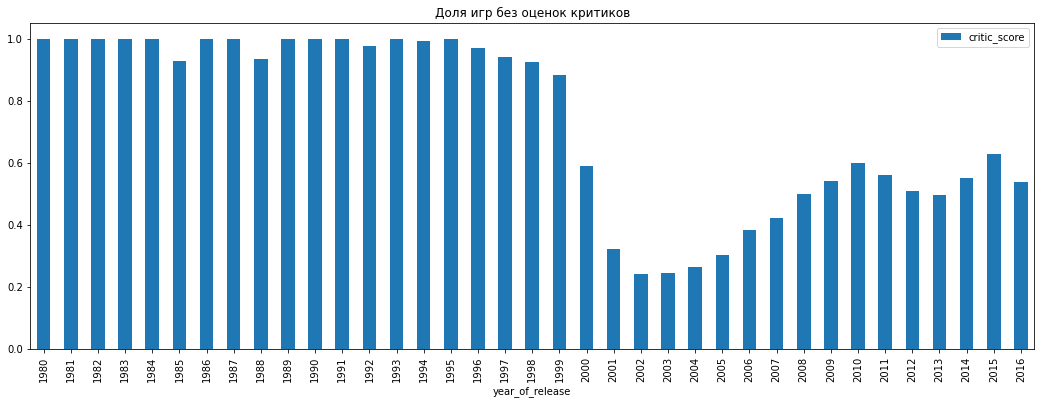

In [25]:
df.groupby('year_of_release') \
    .agg({'critic_score': lambda x: x.isnull().mean()}) \
    .plot.bar(title='Доля игр без оценок критиков', figsize=(18, 6));

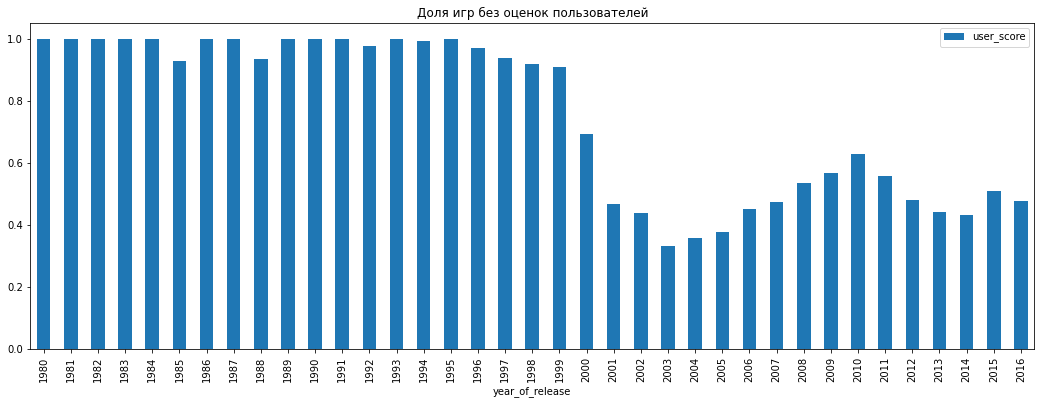

In [26]:
df.groupby('year_of_release') \
    .agg({'user_score': lambda x: x.isnull().mean()}) \
    .plot.bar(title='Доля игр без оценок пользователей', figsize=(18, 6));

Совершенно очевидно, что в период после 1998 года количество игр без оценки пользователей и критиков резко уменьшилось. Наверно на это были внешние причины.  Поиск в интернете привел к следующим результатам - в эти годы начали свою работу крупнейшие англоязычный веб-сайты, собирающие рецензии, в том числе и на компьютерные игры, например, [**Rotten Tomatoes, 1998**](https://ru.wikipedia.org/wiki/Rotten_Tomatoes), [**GameRankings, 1999**](https://ru.wikipedia.org/wiki/GameRankings),  [**Metacritic, 2001**](https://ru.wikipedia.org/wiki/Metacritic), [**GameStats, 2002**](https://ru.wikipedia.org/wiki/GameStats). На данных сайтах рейтинги игр формируются, в том числе, по рейтингам игровой прессы и игроков. Иными словами, начиная с 1998 года появляются агрегаторы, собирающие рецензии профессионального сообщества об играх, как следствие, уменьшается доля игр без оценки.

Перечисленные выше сайты-агрегаторы принадлежат американским компаниям. В связи с этим логично предположить, что некоторые игры, созданные или реализуемые не в США, могли остаться без оценок.

Относительно восстановления значений признаков `critic_score`, `user_score` идей нет никаких --- оставим эти два признака без изменений. Пометим отсутствующие значения по признаку `rating` как неопределенные -- `undefined`.

In [27]:
df.rating.fillna('undefined', inplace = True) # замена пропущенных значений в рейтинге на 'undefined'

In [28]:
df[['critic_score', 'user_score', 'rating']].isna().sum()

critic_score    8461
user_score      8981
rating             0
dtype: int64

Удалим игры с нулевыми продажами

In [29]:
df.drop(df.query('(na_sales == 0) & (eu_sales == 0) & (jp_sales == 0) & (other_sales == 0)').index, inplace=True)

In [30]:
df.query('(na_sales == 0) & (eu_sales == 0) & (jp_sales == 0) & (other_sales == 0)').index

Int64Index([], dtype='int64')

**С пропусками закончили, 2 параметра оставили без изменений.**

### 2.4.Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [31]:
df['full_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [32]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


## Выводы по шагу 2

На данном этапе проведены необходимые преобразования над признаками:
- названия столбцов приведены к нижнему регистру;
- преобразованы типы данных;
- заполнены пропущенные значения, где это имело смысл;
- пояснены возможные причины возникновения пропусков в рейтингах игр;
- с рейтингами игр пропущенные значения остались без изменений;
- исправлена аббревиатура 'tbd' в столбцах с рейтингом;
- посчитаны суммарные продажи во всех регионах, новые значения записаны в отдельный столбец;
- удалены игры без названия и жанра, с нулевыми продажами.

## Шаг 3. Исследовательский анализ 

Шаг 3 будем проводить по следующему плану:

- 3.1.Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- 3.2 Как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитываем в работе данные за предыдущие годы.
 Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- 3.3. Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- 3.4. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- 3.5 Соотнесем выводы с продажами игр на других платформах.
- 3.6. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### 3.1.Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

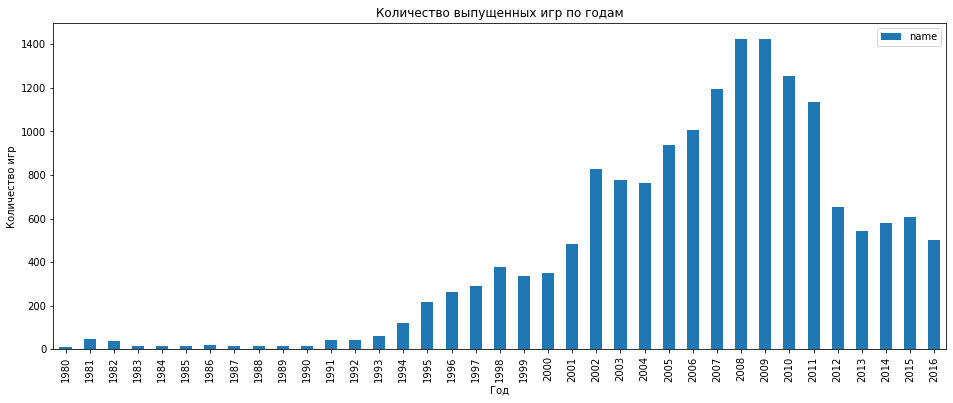

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))
games_all = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_all.plot.bar(ax=ax);
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр по годам')
plt.show();

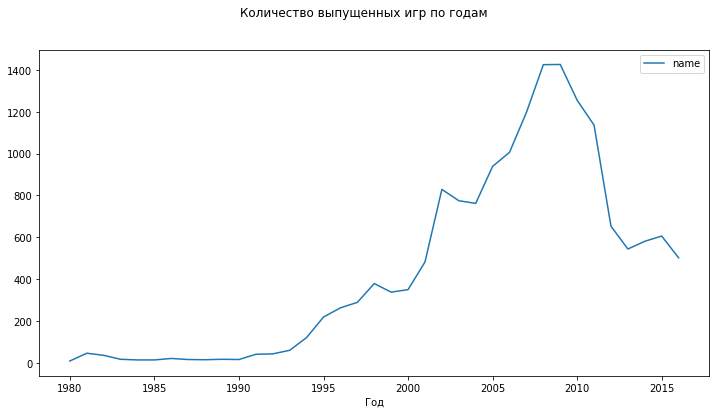

In [34]:
games_all.plot(kind='line', subplots=True, figsize=(12, 6), sharex = False, sharey = False, 
               title = 'Количество выпущенных игр по годам');
plt.xlabel('Год')
plt.show();

**Вывод**: Видим, что начиная с 1991 года до 2008 год, наблюдается рост выпуска компьютерных игр, а вот начиная с 2009 года объемы выпуска снижаются. Возможно это связано с ростом числа гаджетов. С 2012 года наблюдается некая стабильность объемов выпуска. Думаю, что ориентироваться для краткосрочного анализа на один 2016 год нужно по данным, начиная с 2012 года.

### 3.2 Как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построем распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмем данные за соответствующий актуальный период. Актуальный период мы определили, как период после 2012 года. Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Популярные платформы за весь период наблюдений

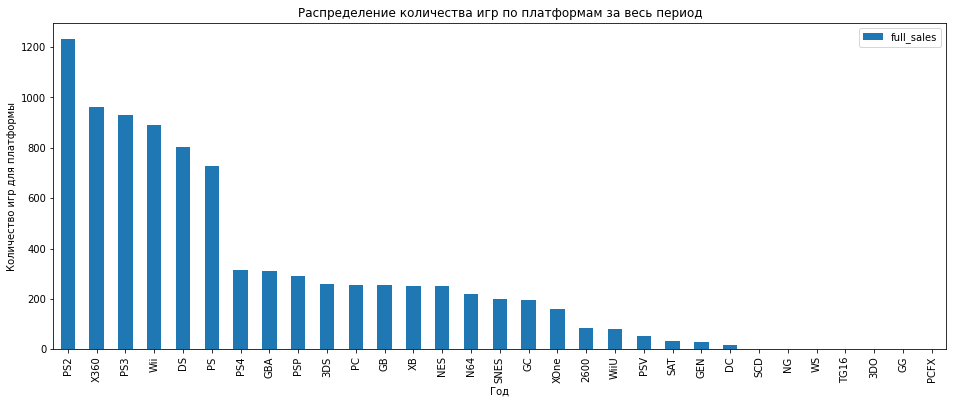

In [35]:
fig, ax = plt.subplots(figsize=(16, 6))
platform_on_sales = df.pivot_table(index='platform', values='full_sales', aggfunc='sum')\
.sort_values(by='full_sales', ascending=False)
platform_on_sales.plot.bar(ax=ax);
plt.xlabel('Год')
plt.ylabel('Количество игр для платформы')
plt.title('Распределение количества игр по платформам за весь период')
plt.show();

Популярные платформы, начиная с 2012 года

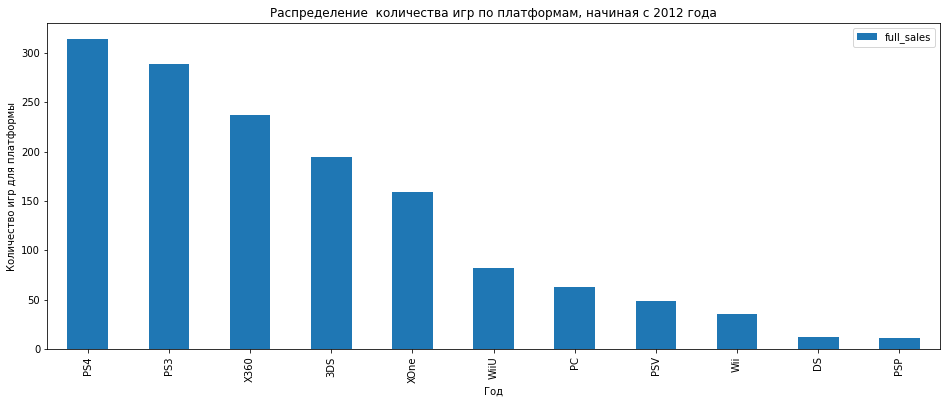

In [36]:
fig, ax = plt.subplots(figsize=(16, 6))
platform_on_sales_from_2012 = df[df.year_of_release >= 2012].pivot_table(index='platform', values='full_sales', aggfunc='sum')\
.sort_values(by='full_sales', ascending=False)
platform_on_sales_from_2012.plot.bar(ax=ax);
plt.xlabel('Год')
plt.ylabel('Количество игр для платформы')
plt.title('Распределение  количества игр по платформам, начиная с 2012 года')
plt.show();

**вывод** с течением времени платформы меняют свой рейтинг. После 2012 года фавориты изменились, относительно всего периода наблюдений.

Топ-5 платформ с наибольшими суммарными продажами за весь период наблюдений

In [37]:
top_5_from_all = platform_on_sales.reset_index().rename_axis(None, axis=1)[:5]
display(top_5_from_all)

,platform,full_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


Топ-5 платформ с наибольшими суммарными продажами, начиная с 2012 года

In [38]:
top_5_from_2012 = platform_on_sales_from_2012.reset_index().rename_axis(None, axis=1)[:5]
display(top_5_from_2012)

,platform,full_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


Выберем значения датафрейма для топ- 5 платформ за все периоды наблюдений и после 2012 года. Создадим для них дополнительные таблицы.

In [39]:
df_top5_plat_all = df.loc[df['platform'].isin(list(top_5_from_all['platform']))]
df_top5_plat_from_2012 = df[df.year_of_release >= 2012].loc[df['platform'].isin(list(top_5_from_2012['platform']))]

In [40]:
df_top5_plat_all.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [41]:
df_top5_plat_from_2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [42]:
top_5_all = df_top5_plat_all.pivot_table(index='year_of_release', columns='platform', 
                             values='full_sales', aggfunc='sum')\
                            .sort_values('year_of_release', ascending=False).fillna(0)

top2012_5 = df_top5_plat_from_2012.pivot_table(index='year_of_release', columns='platform', 
                             values='full_sales', aggfunc='sum')\
                            .sort_values('year_of_release', ascending=False).fillna(0)

построим графики жизенного цикла за весь период наблюдений и за период после 2012 года

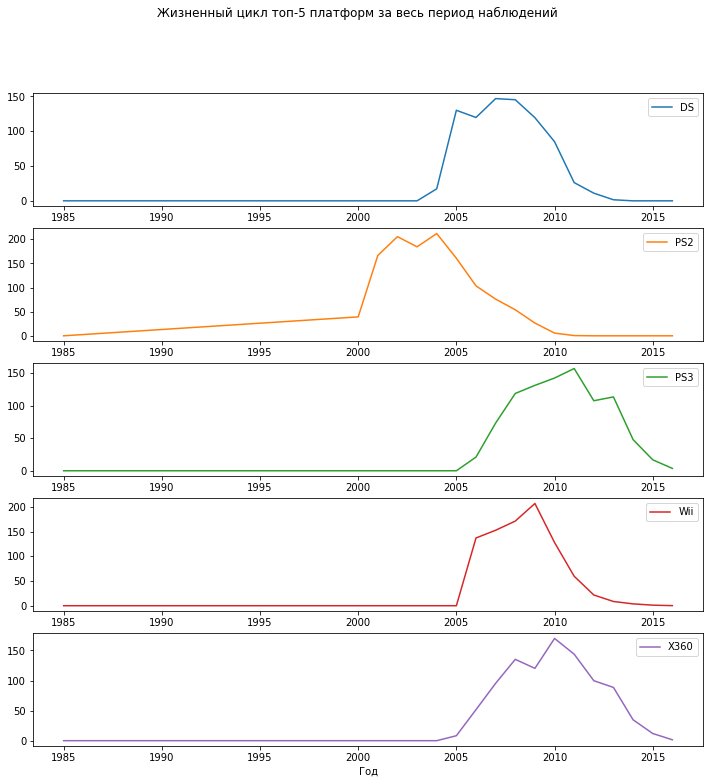

In [43]:
top_5_all.plot(kind='line', subplots=True, figsize=(12, 12), sharex = False, sharey = False, 
               title = 'Жизненный цикл топ-5 платформ за весь период наблюдений');
plt.xlabel('Год')
plt.show();

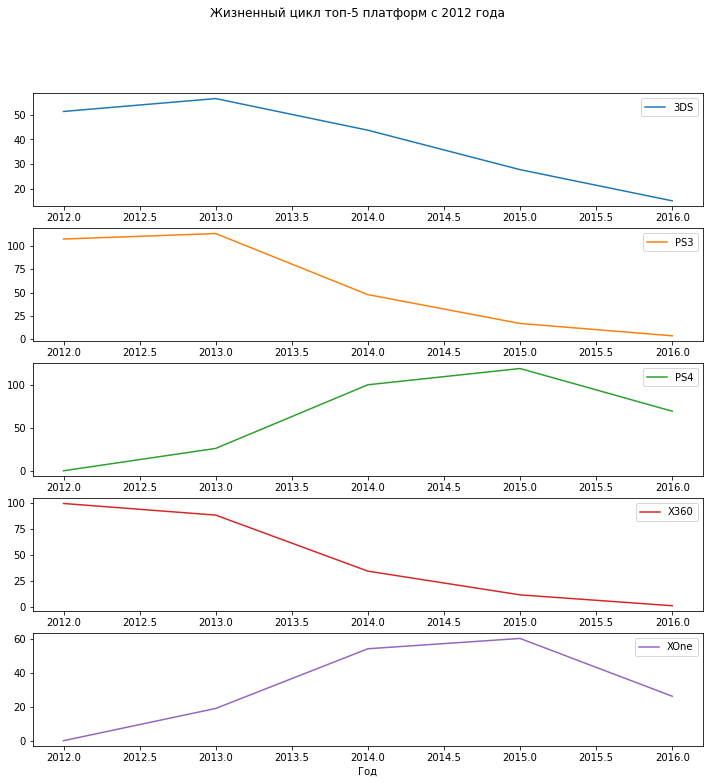

In [44]:
top2012_5.plot(kind='line', subplots=True, figsize=(12, 12), sharex = False, sharey = False, 
               title = 'Жизненный цикл топ-5 платформ с 2012 года');
plt.xlabel('Год')
plt.show();

В среднем платформа живет 10 лет. В Топе-5, после 2012 года 3 платформы почти прекратили свое существование. посмотрим на топ-10 после 2012 года. Как там обстоят дела с жизнью платформ?

In [45]:
# код повторяет предыдущие вычисления, только берем первые 10 платформ
top_10_from_2012 = platform_on_sales_from_2012.reset_index().rename_axis(None, axis=1)[:10]
df_top10_plat_from_2012 = df[df.year_of_release >= 2012].loc[df['platform'].isin(list(top_10_from_2012['platform']))]

top2012_10 = df_top10_plat_from_2012.pivot_table(index='year_of_release', columns='platform', 
                             values='full_sales', aggfunc='sum')\
                            .sort_values('year_of_release', ascending=False).fillna(0)

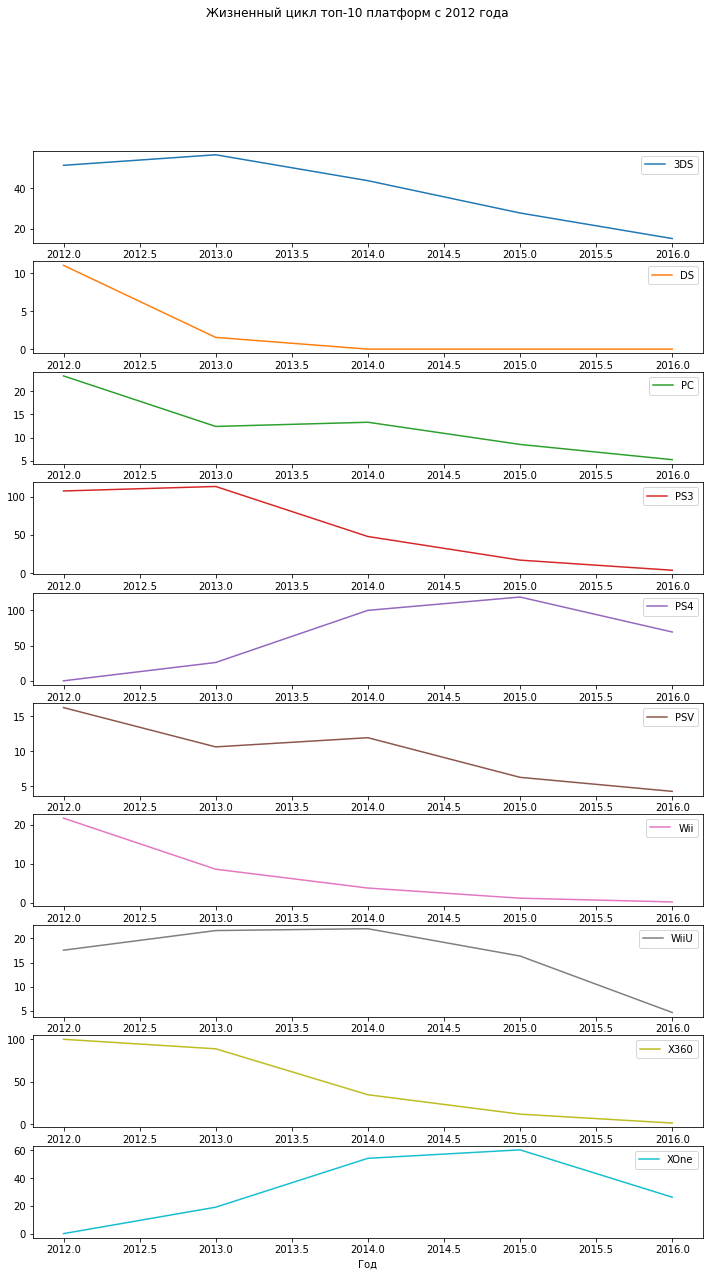

In [46]:
top2012_10.plot(kind='line', subplots=True, figsize=(12, 20), sharex = False, sharey = False, 
               title = 'Жизненный цикл топ-10 платформ с 2012 года');
plt.xlabel('Год')
plt.show();

В целом тенденция сохранилась, из 10 платформ, 7 почти прекратили продажи. Выберем в качестве актуальных те, кто сохранил продажи на 2016 год. Это `PS4`, `XOne` и `3DS`, которая хоть и имеет устойчивую тенденцию к уменьшению продаж, но тем не менее является 3й по суммарным продажам в 2016 году.

In [47]:
top2012_10

platform,3DS,DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2016,15.14,0.00,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15
2015,27.78,0.00,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2014,43.76,0.00,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2013,56.57,1.54,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2012,51.36,11.01,23.22,107.36,0.00,16.19,21.71,17.56,99.74,0.00


### 3.3. Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Будем брать для построения графика топ-5 платформ после 2012 года, куда входят наши фавориты:

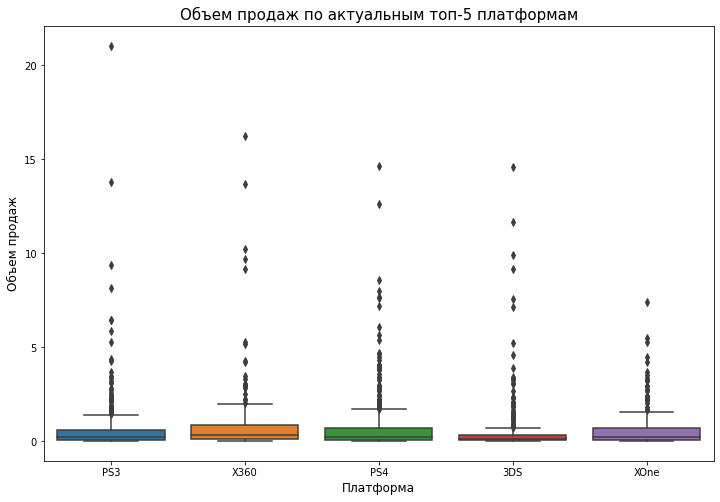

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_top5_plat_from_2012, x='platform', y='full_sales');
plt.title('Объем продаж по актуальным топ-5 платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show();

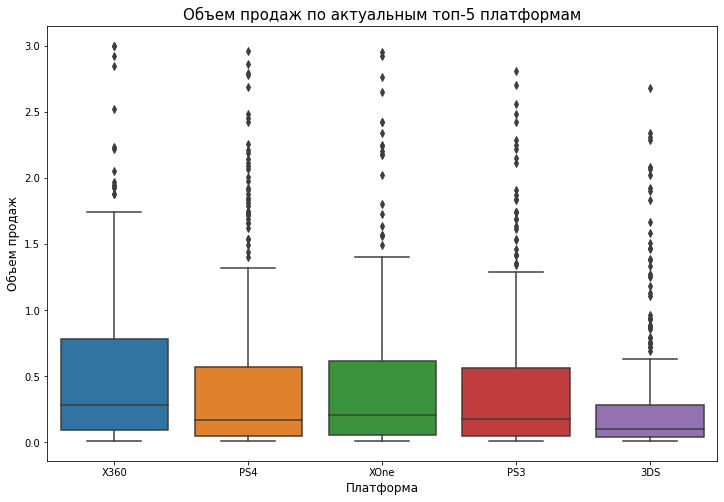

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_top5_plat_from_2012[df_top5_plat_from_2012['full_sales']<=3], x='platform', y='full_sales');
plt.title('Объем продаж по актуальным топ-5 платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Объем продаж',fontsize=12)
plt.show();

**Вывод по ящику с усами**:
- много выбросов;
- медианные значения по платформам `X360` и `XOne` больше остальных. Скорее всего это потому, что они эти платформы существуют гораздо дольше других 3-х.

### 3.4. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

В качестве самой актуальной выберем платформу `PS4`. На 2016 год у нее больше всего продаж и тенденция общего спада за последние 2 года самая слабая. Плюс суммарно за период с 2012 года она тоже фаворит (суммарная продажа - 314.14 миллиона проданных копий)

Диаграмма рассеивания

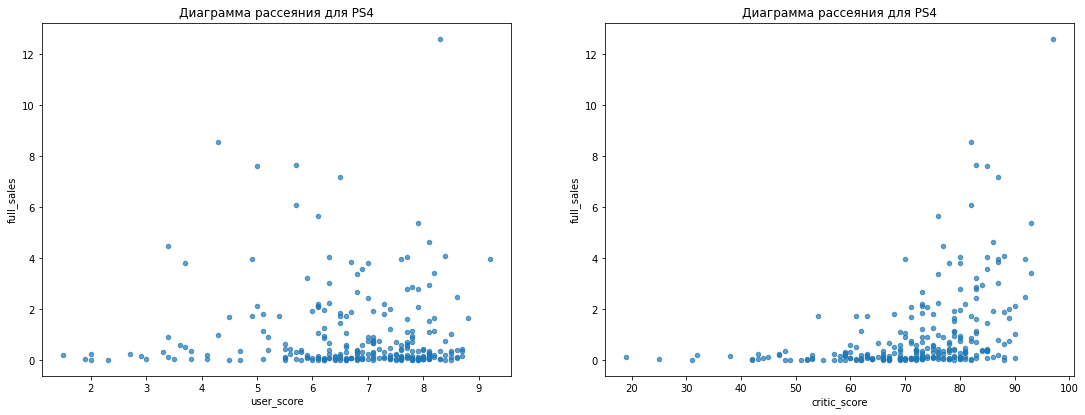

In [50]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 6.5)

growing_platforms = ['PS4']
score_types = ['user_score', 'critic_score']
num_of_subplot = 0

for platform_name in growing_platforms:
    for score_type in score_types:
        (df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == platform_name]
         .plot(x=score_type, 
               y='full_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {}'.format(platform_name), 
               ax = ax[num_of_subplot],
               alpha=0.7))
        num_of_subplot += 1

матрица корреляций

In [51]:
df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == 'PS4']\
            [['user_score', 'critic_score', 'full_sales']].corr()

,user_score,critic_score,full_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
full_sales,-0.031957,0.406568,1.000000


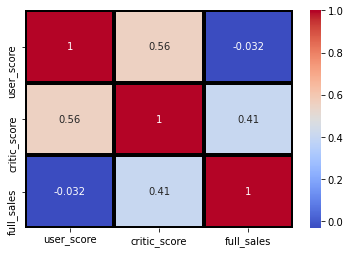

In [52]:
sns.heatmap(df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == 'PS4']\
            [['user_score', 'critic_score', 'full_sales']].corr(), annot = True, 
             cmap= 'coolwarm', linewidths=3, linecolor='black');

**Выводы для популярной платформы**: 
- пользователи и критики большинство  игр оценивают достаточно высоко: у пользователей большинство оценок находится в интервале  от 5.5 до 8.7, у критиков  от 58 до 80 (согласно диаграммы рассеивания)
- наиболее выпускаемые игры пользователи оценивали по-разному, используя практически всю шкалу рейтинга; критики более единодушны к подобным играм и оценивают их достаточно высоко;
- на общий объем продаж влияние оказывает рейтинг критиков (коэфициент корреляции ~ 0.41)
- влиянием рейтинга пользователей на объемы продаж можно принебречь.

### 3.5 Соотнесем выводы с продажами игр на других платформах.

Построим диаграммы рассеяния для оставшихся платформ из топ-5. И посчитаем матрицы корреляций для них.

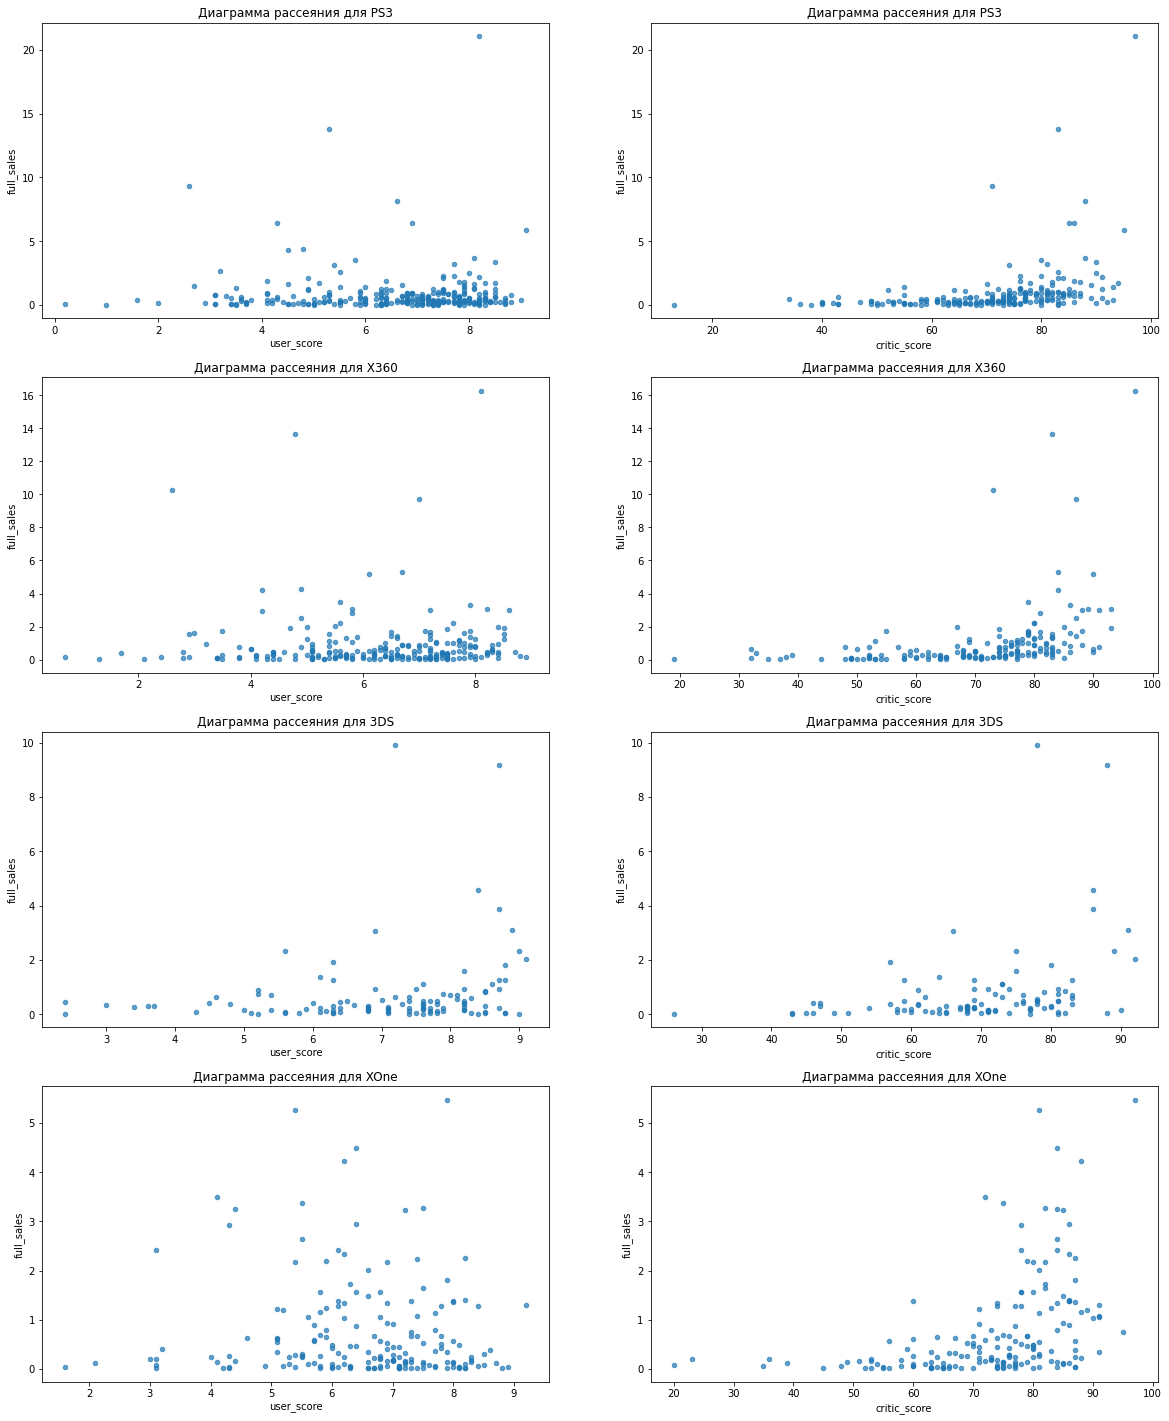

In [53]:
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(20, 25)
axs = [ax[i, j] for i in range(4) for j in range(2)]

growing_platforms = ['PS3', 'X360', '3DS', 'XOne']
score_types = ['user_score', 'critic_score']
num_of_subplot = 0
for platform_name in growing_platforms:
    for score_type in score_types:
        (df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == platform_name]
         .plot(x=score_type, 
               y='full_sales', 
               kind='scatter', 
               title='Диаграмма рассеяния для {}'.format(platform_name), 
               ax = axs[num_of_subplot],
               alpha=0.7))
        num_of_subplot += 1

**Выводы по диаграммам рассеивания**:

Видим, что 
- по долго существующим платформам `X360` и `PS3` оценки пользователей и критиков имеют достаточно широкие интервалы. Наверно это связано с тем, что за это время было выпущено много различных игр, и оценки были разными. Однако наиболее продаваемые игры критики оценили более высоко, чем пользователи.
- для новых платформ `3DS` и `XOne`  оценок пользователей и критиков значительно меньше. Разброс оценок пользователей более широкий. Критики, в целом более высоко оценивают наиболее продаваемые игры.

Посчитаем матрицы корреляций оценок и продаж для остальных платформ

In [54]:
growing_platforms = ['PS3', 'X360', '3DS', 'XOne']

for platform_name in growing_platforms:
    print('Матрица корреляций для платформы',platform_name )
    print(df_top5_plat_from_2012[df_top5_plat_from_2012['platform'] == platform_name]\
            [['user_score', 'critic_score', 'full_sales']].corr())
    print()
    
    
   

Матрица корреляций для платформы PS3
              user_score  critic_score  full_sales
user_score      1.000000      0.539456   -0.005144
critic_score    0.539456      1.000000    0.331497
full_sales     -0.005144      0.331497    1.000000

Матрица корреляций для платформы X360
              user_score  critic_score  full_sales
user_score      1.000000      0.557352    0.006164
critic_score    0.557352      1.000000    0.360573
full_sales      0.006164      0.360573    1.000000

Матрица корреляций для платформы 3DS
              user_score  critic_score  full_sales
user_score      1.000000      0.722762    0.197583
critic_score    0.722762      1.000000    0.320803
full_sales      0.197583      0.320803    1.000000

Матрица корреляций для платформы XOne
              user_score  critic_score  full_sales
user_score      1.000000      0.472462   -0.068925
critic_score    0.472462      1.000000    0.416998
full_sales     -0.068925      0.416998    1.000000



**Выводы по матрицам корреляции**: 
- для всех четырех платформ на общий объем продаж игр влияние оказывает рейтинг критиков;
- для платформы `3DS` рейтинг пользователей также оказывает положительное прямое влияние на объемы продаж. Судя по диаграмме рассеивания оценки пользователей и критиков там схожи.

**Сопоставление выводов по платформе `PS4` и платформам `PS3`, `X360`, `3DS`, `XOne`**
По влиянию рейтинга пользователей и критиков на объемы продаж платформа `PS4` больше схожа с новыми платформами `3DS`, `XOne`. 

### 3.6. Распределение игр по жанрам. 

Попробуем оценить самые прибыльные жанраы. Проверим, выделяются ли жанры с высокими и низкими продажами.

Посторим сводную таблицу по жанрам за актуальный период после 2012 года

In [55]:
# посмотрим какие жанры встречаются в играх
df_top5_plat_from_2012.genre.unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Adventure',
       'Puzzle', 'Strategy'], dtype=object)

In [56]:
genre_all=df_top5_plat_from_2012.pivot_table(index='genre', values='full_sales', aggfunc='sum')\
.sort_values(by='full_sales', ascending=False)

genre_all=genre_all.reset_index().rename_axis(None, axis=1)

In [57]:
display(genre_all)

,genre,full_sales
0,Action,376.25
1,Shooter,282.11
2,Sports,167.81
3,Role-Playing,151.26
4,Misc,48.78
5,Racing,42.18
6,Fighting,35.53
7,Platform,34.13
8,Simulation,25.16
9,Adventure,22.68


построим гистограмму

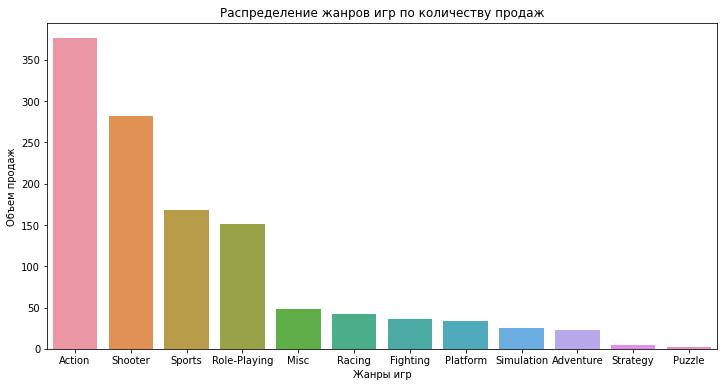

In [58]:
plt.figure(figsize=(12,6))
plt.title('Распределение жанров игр по количеству продаж')
sns.barplot(data=genre_all, x='genre', y='full_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Объем продаж');

Перестроим график, взяв за показатель медианные значения от объема продаж

In [59]:
genre_all=df_top5_plat_from_2012.pivot_table(index='genre', values='full_sales', aggfunc='median')\
.sort_values(by='full_sales', ascending=False)

genre_all=genre_all.reset_index().rename_axis(None, axis=1)

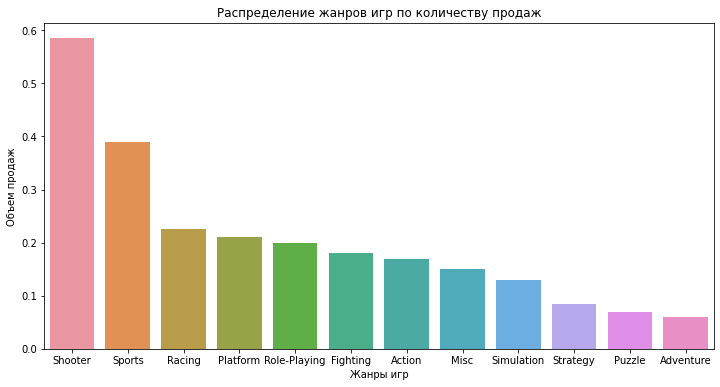

In [60]:
plt.figure(figsize=(12,6))
plt.title('Распределение жанров игр по количеству продаж')
sns.barplot(data=genre_all, x='genre', y='full_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Объем продаж');

**Вывод:** 
наиболее успешные жанры `Shooter` и `Sports`. Самые мало продаваемые это `Puzzle` и `Adventure`

## Выводы по шагу 3
- начиная с 1990 года до 2008 год, наблюдается рост выпуска компьютерных игр, с 2009 года объемы выпуска снижаются, с 2012 по 2016 годы ситуация стала более спокойной; 
- определен топ-5 наиболее популярных игровых платформ как за весь период наблюдения (платформы `PS2`, `X360`, `PS3`, `Wii`, `DS`), так и за актуальный период (`PS4`, `PS3`, `X360`, `3DS`, `XOne`); длительность жизненного цикла игровой платформы не превышает, как правило, 10 лет;
- в качестве актуального периода принят период с 2012 года;
- в актуальном периоде больше всего игр продано для платформы PS4;
- для всех актуальных платформ из топ-5 наблюдается прямое положительное влияние оценок критиков на объемы продаж; влияние оценок пользователей менее значимо.
- наиболее успешные жанры `Shooter` и `Sports`. Самые мало продаваемые это `Puzzle` и `Adventure`	


## Шаг 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- 4.1.Самые популярные платформы (топ-5). ПОсмотрим различия в долях продаж.
- 4.2.Самые популярные жанры (топ-5). 
- 4.3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 4.1.Самые популярные платформы (топ-5).

В качестве данных берем акутальные данные (после 2012 года). Для метода построения сводной таблицы воспользуемся методом crosstab, т.к. его метод 
`normalize` позвояет получать данные сразу в долях.

Исследуем топ-5 платформ: `PS4`, `PS3`, `X360`, `3DS`, `XOne` для регионов  `NA`-- Северная Америка, `EU`--Европа , `JP`--Япония

**Северная Америка**

In [61]:
na = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['platform'], 
            values=df_top5_plat_from_2012['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)

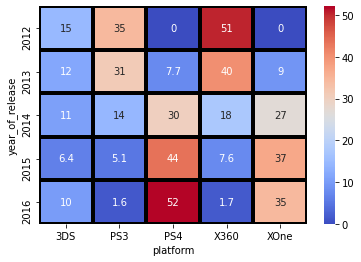

In [62]:
sns.heatmap(na,annot = True, 
             cmap= 'coolwarm', linewidths=3, linecolor='black');


**Европа**

In [63]:
eu=pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['platform'], 
            values=df_top5_plat_from_2012['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)

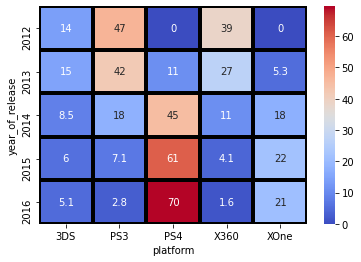

In [64]:
sns.heatmap(eu,annot = True, 
             cmap= 'coolwarm', linewidths=3, linecolor='black');


**Япония**

In [65]:
jp=pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['platform'], 
            values=df_top5_plat_from_2012['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)

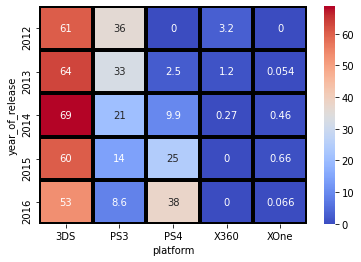

In [66]:
sns.heatmap(jp,annot = True, 
             cmap= 'coolwarm', linewidths=3, linecolor='black');


**Вывод по платформам**: 

- в Северной Америке и Европе со значительным перевесом по доли продаваемых игр лидирует платформа `PS4`
- в Японии ситуация совсем другая. Лидерство принадлежит платформе `3DS`, но в целом ее доля начала незначительно снижаться.`PS4` активно наращивает продажи в регионе.

### 4.2.Самые популярные жанры (топ-5).

Так же будем проверять жанры игр для регионов  `NA`-- Северная Америка, `EU`--Европа , `JP`--Япония

Строим сводную таблицу по всем жанрам в **Северной Америке**

In [67]:
na = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['genre'], 
            values=df_top5_plat_from_2012['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)
na

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,34.451378,1.542728,3.085457,2.080083,3.874155,0.260010,2.894782,8.164327,28.289132,2.695441,12.142486,0.520021
2013,36.909709,0.906687,2.160937,7.004156,3.800529,0.068002,3.060068,9.013978,21.752928,1.080468,13.774084,0.468455
2014,30.054931,1.272997,3.662046,6.766065,2.005406,0.052315,2.415206,10.794315,25.930770,0.139506,16.862848,0.043596
2015,22.874536,2.930252,3.807264,3.146925,0.423029,0.061907,2.156418,12.979777,31.015270,1.186546,19.129179,0.288898
2016,19.946680,2.205526,3.247698,0.920989,2.835676,0.000000,1.769268,13.330102,37.081920,0.266602,18.250121,0.145419


выбираем 5 лучшших

In [68]:
na_genre_5=na.sum().sort_values(ascending = False)
na_genre_5[:5]


genre
Action          144.237233
Shooter         144.070019
Sports           80.158717
Role-Playing     54.282499
Misc             19.918218
dtype: float64

Посмотрим графически динамику для топ 5 жанров

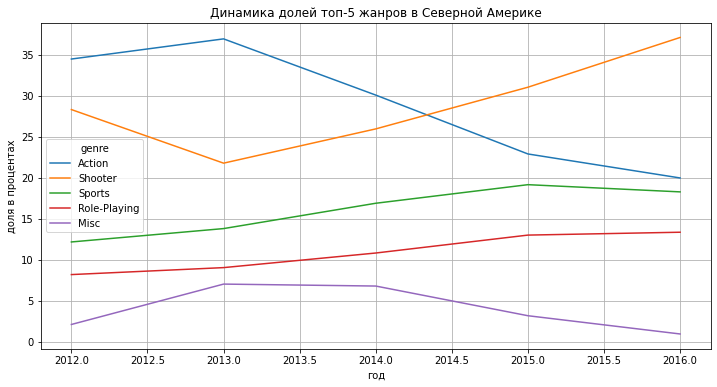

In [69]:
na[['Action', 'Shooter', 'Sports',  'Role-Playing','Misc']].plot(grid=True, figsize=(12,6))
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Северной Америке')
plt.show();

**Европа**

In [70]:
eu = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['genre'], 
            values=df_top5_plat_from_2012['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)
eu

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,38.015230,1.051614,2.284540,1.027439,4.182280,0.338450,6.841533,6.454732,27.656231,3.251541,8.364559,0.531851
2013,39.062966,1.124043,1.700985,4.406645,4.565801,0.477469,5.650055,8.216453,19.297722,2.556451,12.434099,0.507311
2014,33.906706,1.516035,1.768707,6.520894,2.866861,0.009718,5.014577,9.135083,22.847425,0.165209,16.248785,0.000000
2015,25.179771,3.784039,2.758458,2.499116,0.330072,0.141459,5.363669,13.332547,26.240717,2.086526,18.106802,0.176824
2016,20.870707,2.340844,2.209582,0.700066,2.734631,0.000000,3.609713,8.160140,32.421790,0.918836,25.814920,0.218771


In [71]:
eu_genre_5=eu.sum().sort_values(ascending = False)
eu_genre_5[:5]

genre
Action          157.035380
Shooter         128.463884
Sports           80.969166
Role-Playing     45.298955
Racing           26.479547
dtype: float64

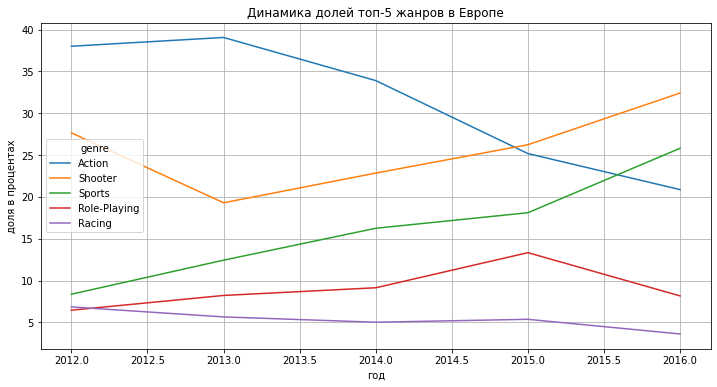

In [72]:
eu[['Action', 'Shooter', 'Sports',  'Role-Playing','Racing']].plot(grid=True, figsize=(12,6))
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Европе')
plt.show();

**Япония**

In [73]:
jp = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['genre'], 
            values=df_top5_plat_from_2012['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)
jp

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,24.651304,3.365676,4.335961,5.033354,7.731959,0.909642,0.515464,21.194663,7.762280,17.434809,5.852032,1.212856
2013,24.346185,3.774602,2.830952,5.527096,2.750067,0.674036,1.455918,43.920194,4.556484,5.958479,3.073605,1.132381
2014,15.864587,1.958181,12.147361,2.987056,3.650846,0.497843,0.497843,51.775639,3.551278,1.261201,4.115500,1.692665
2015,53.408648,1.675107,3.077522,5.220101,0.428516,1.986755,0.895988,19.477990,4.947409,6.116089,2.298403,0.467472
2016,35.145889,4.973475,3.183024,4.376658,0.729443,0.000000,0.066313,37.201592,6.564987,2.122016,4.708223,0.928382


In [74]:
jp_genre_5=jp.sum().sort_values(ascending = False)
jp_genre_5[:5]

genre
Role-Playing    173.570078
Action          153.416612
Simulation       32.892595
Shooter          27.382438
Fighting         25.574821
dtype: float64

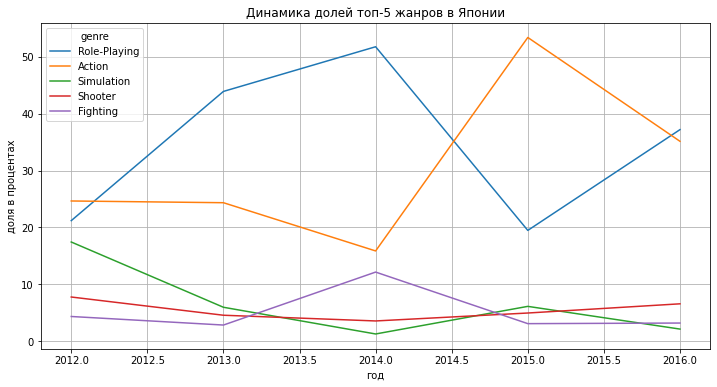

In [75]:
jp[['Role-Playing','Action', 'Simulation', 'Shooter',  'Fighting']].plot(grid=True,figsize=(12,6) )
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Японии')
plt.show();

**Вывод по жанрам** 
- в Северной Америке и Европе популярен практически одинаковый набор жанров `Action, Misc, Role-Playing, Shooter, Sports` и `Action, Racing, Role-Playing, Shooter, Sports`, соответственно. В последние годы наибольшей популярностью у покупателей этих регионов пользуются игры жанра `Shooter`.
- в Японии топ-5 жанров игр это `Action, Fighting, Role-Playing, Shooter, Simulation`. Набор немного отличается от североамеринского и европейского, а именно жанрами `Fighting` и `Simulation`. Сменяя друг друга, лидерство удерживают жанры `Action` и `Role-Playing`. Жанр `Shooter`, так популярный в 2х других регионах, далеко внизу.

### 4.3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Воспользуемся шкалой рейтинга **ESRB** Из Википедии (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) и переведем для удобства ее на русский язык. Заменим названия градаций и в данных. 

In [76]:
dict_rating = {'E':'старше 6 лет',
               'E10+':'старше 10 лет',
               'T':'старше 13 лет',
               'M':'старше 17 лет',
               'undefined': 'Рейтинг неизвестен'}
df_top5_plat_from_2012['rating'] = df_top5_plat_from_2012['rating'].map(dict_rating)

In [77]:
df_top5_plat_from_2012['rating'].unique()

array(['старше 17 лет', 'Рейтинг неизвестен', 'старше 6 лет',
       'старше 13 лет', 'старше 10 лет'], dtype=object)

Далее проведем аналогичные исследования (как и для платформ) для рейтинга, для наших 3-х регионов.

**Северная Америка**

In [78]:
na = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['rating'], 
            values=df_top5_plat_from_2012['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)
na

rating,Рейтинг неизвестен,старше 10 лет,старше 13 лет,старше 17 лет,старше 6 лет
year_of_release,,,,,
2012,6.534928,8.363668,11.275784,49.713989,24.111631
2013,16.259917,9.867775,6.535701,49.814885,17.521723
2014,20.577208,10.332200,11.953963,40.326096,16.810533
2015,29.178704,11.174164,13.309946,30.447792,15.889393
2016,19.631604,6.301503,18.904508,36.500242,18.662143


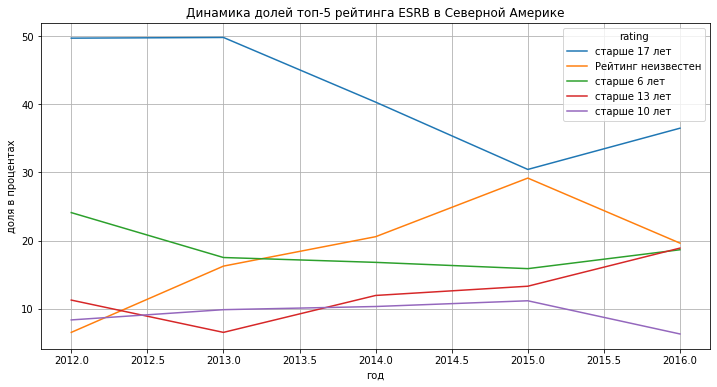

In [79]:
rating=['старше 17 лет', 'Рейтинг неизвестен', 'старше 6 лет',
       'старше 13 лет', 'старше 10 лет']
na[rating].plot(grid=True, figsize=(12,6))
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Северной Америке')
plt.show();

**Европа**

In [80]:
eu = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['rating'], 
            values=df_top5_plat_from_2012['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)
eu

rating,Рейтинг неизвестен,старше 10 лет,старше 13 лет,старше 17 лет,старше 6 лет
year_of_release,,,,,
2012,7.953584,7.071195,9.851324,47.745679,27.378218
2013,16.989953,10.195961,5.520740,47.796678,19.496668
2014,18.804665,10.447036,10.068027,42.206025,18.474247
2015,31.510079,5.564069,10.963103,30.838147,21.124602
2016,14.613870,5.797419,18.420477,33.756290,27.411945


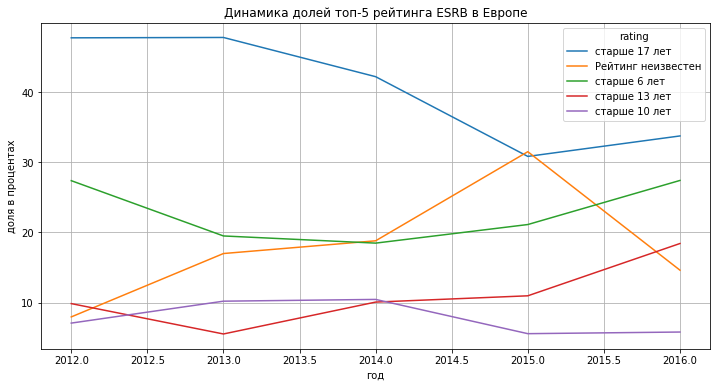

In [81]:
rating=['старше 17 лет', 'Рейтинг неизвестен', 'старше 6 лет',
       'старше 13 лет', 'старше 10 лет']
eu[rating].plot(grid=True, figsize=(12,6))
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Европе')
plt.show();

**Япония**

In [82]:
jp = pd.crosstab(index=df_top5_plat_from_2012['year_of_release'], columns=df_top5_plat_from_2012['rating'], 
            values=df_top5_plat_from_2012['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)
jp

rating,Рейтинг неизвестен,старше 10 лет,старше 13 лет,старше 17 лет,старше 6 лет
year_of_release,,,,,
2012,30.169800,4.548211,13.947847,19.739236,31.594906
2013,59.530871,2.561337,12.267458,14.613103,11.027231
2014,63.391968,3.650846,16.395619,10.155991,6.405576
2015,60.225945,4.518894,14.530580,10.907674,9.816907
2016,73.541114,0.729443,11.206897,7.758621,6.763926


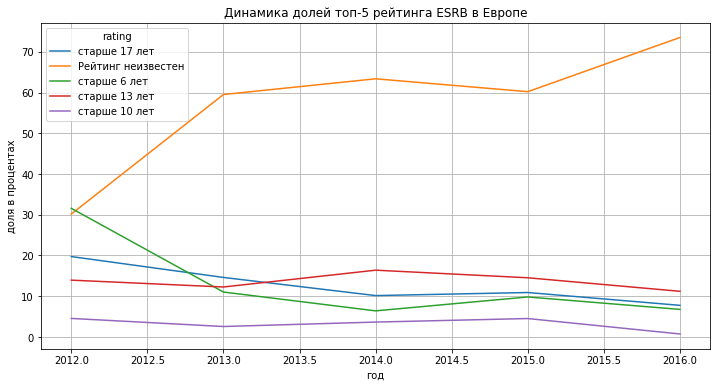

In [83]:
rating=['старше 17 лет', 'Рейтинг неизвестен', 'старше 6 лет',
       'старше 13 лет', 'старше 10 лет']
jp[rating].plot(grid=True, figsize=(12,6))
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Европе')
plt.show();

Выводы по рейтингам в регионах:
- в Северной Америке и Европе наиболее продаваемыми играми являются игры с жанром `старше 17 лет`. Доля игр для детей `старше 6 лет` стала расти. С 2015 года стали снижаться доли продаж игр `без рейтинга`. 
- в Японии наиболее продаваемые игры `без рейтинга`; из рейтинговых наибольшей популярностью пользуются игры с меткой `старше 13 лет`. 

## Выводы по шагу 4

- портрет пользователя из Северной Америки: скорее всего, игровая платформа `PS4` или `XOne`; наиболее популярные жанры `Shooter`, `Action` и `Sports`; предпочитает игры с оценкой `старше  17 лет`, также активно покупаются игры с оценкой `старше 6 лет`;
- портрет пользователя из Европы:  скорее всего, игровая платформа `PS4`, чуть меньше распространена платформа `XOne`; наиболее популярные жанры `Shooter`, `Sports`, `Action`; предпочитает игры с оценкой `старше  17 лет`, также активно покупаются игры с оценкой `старше  6 лет`;
- портрет пользователя из Японии: скорее всего, игровая платформа `3DS`, но все большую популярность приобретает платформа `PS4`; наиболее популярные жанры `Action` и `Role-Playing`, среди оставшихся жанров можно выделить `Shooter`; предпочитает игры с без рейтинга или с оценкой `старше  13 лет`.

## Шаг 5. Проверка гипотез.

- 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Выдвинем нулевую гипотизу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативной будет, что они различаются.
Построим график распределения пользовательских рейтингов по этим платформам.

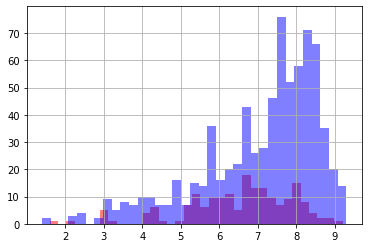

In [84]:
df[df['platform'] =='XOne']['user_score'].hist(bins=35, alpha=0.5, color='red')
df[df['platform'] =='PC']['user_score'].hist(bins=35, alpha=0.5, color='blue');

по графику видно, что распределения различны. Что бы посчитать значения p-value, удалим пустые значения из рейтингов.

In [85]:
sample_1 = df.loc[df['platform'] =='XOne','user_score'].dropna().reset_index(drop=True) 
# sample_1 - выборка рейтинга для платформы XOne

sample_2 = df.loc[df['platform'] =='PC','user_score'].dropna().reset_index(drop=True)
# sample_2 - выборка рейтинга для платформы PC

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
alpha=0.01


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-значение:  4.5385802963771835e-06
Отвергаем нулевую гипотезу 


### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Выдвинем нулевую гипотизу: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативной будет, что они разные. Построим график распределения пользовательских рейтингов по этим жанрам.

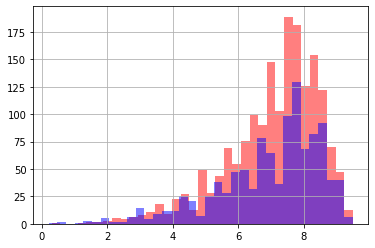

In [86]:
df[df['genre'] =='Action']['user_score'].hist(bins=35, alpha=0.5, color='red')
df[df['genre'] =='Sports']['user_score'].hist(bins=35, alpha=0.5, color='blue');

In [87]:
sample_1 = df.loc[df['genre'] =='Action','user_score'].dropna().reset_index(drop=True) 
# sample_1 - выборка рейтинга для жанра Action

sample_2 = df.loc[df['genre'] =='Sports','user_score'].dropna().reset_index(drop=True)
# sample_2 - выборка рейтинга для жанра Sports

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)
alpha=0.01


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-значение:  0.07370217419278526
Не получилось отвергнуть нулевую гипотезу 


## Выводы по шагу 5
Были выдвинуты 2 нулевые гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. Средние пользовательские рейтинги жанров Action и Sports одинаковые

В результате проверки первая гипотеза не подтвердилась, а вторая подтвердилась.
Использовался метод t теста. Пороговое значение выбрано достаточно малым 0.01. Но и на большем стандартном значении для alpha = 0.05 результат остался прежним, это видно по значениям.

Визуально это видно и на графиках, где четко прослеживается различие в первом случае и похожесть во втором.

## Общий вывод

1. На успешность продаж компьютерных игр влияют платформа, жанр, рейтинг критиков, оценка по возрасту, регион.
2. Рынки Северной Америки и Европы во многом схожи. Рынок Японии сильно отличаетсяя от них.
3. Для Северной Америки наиболее перспективным кажется вариант предлагать игры на платформах `PS4` и `XOne`, с жанрами `Shooter`, `Action` и `Sports`. ПО возасту набирают популярность игры для взрослых. Но и немного увеличивается продажи для игр после 6 лет, т.е. для всех. На продажи вляют оценки критиков
4. Для Европы наиболее перспективным кажется вариант предлагать игры на тех же платформах `PS4` и `XOne`. Жанры, в порядке убывания интереса:  `Sports`,`Shooter`, `Action`. Т.е фавориты те же, но расчет немного другой. Рейтиг по возрасту похож - фавориты игры для взрослых, но тут доля игр для детей после 6 лет больше и растет стремительно. Возможно стоит обратить внимание на эту категорию пользователей, как перспективную.
5. Рынок Японии самобытен. Актуальные платформы `3DS` и догоняющая ее `PS4`. Наиболее востребованны жанры `Role-Playing` и немного сдающая позиции `Action`. Остальные жанры намного менее востребованы. Оценки по возрасту для Японии не критичны. Наибольший процент составляют игры без оценок. ДЛя этого рынка значительно е вляние на продажи оказывают не только оценки критиков, но и пользовательске оценки (платформа `3DS`).
6. Пользовательские рейтинги по разным платформам различны. На основании сравнений платформ `Xbox One` и `PC` это подтверждается проверкой статистической гипотезы. Возможно это имеет смысл проверить для других платформ, если планируется активно их предлагать к продаже.
7. По жанрам `Action` и `Sports` средние пользовательские рейтинги похожи. Но и выбранные жанры схожие в какой то мере. 
Если будет приниматься решение о продаже других жанров, то следует провести проверки и для них. Возмножно на основании похожести их пользовательских рейтингов, их можно будет успешно продавать на том же рынке.

